In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.forest import Forest
from sklearn.ensemble import IsolationForest
from sklearn import mixture
from scipy.linalg import qr
import scipy.stats as scp
from math import cos

In [2]:
#n_pts per Gaussian
def sample_points(n_dimensions, n_pts, n_zeros):
    n_ones = n_pts - n_zeros
    pts = np.zeros((n_dimensions,n_pts))
    for i in range(n_dimensions):
        pts[i,:n_ones] = (2*np.random.randint(2, size=n_ones))-1
    return pts
        
    

In [3]:
n_dimensions = 10
n_pts = 1000
n_zeros = 30
pts = sample_points(n_dimensions, n_pts, n_zeros)

In [34]:
def get_iso(pts, sample_num):
    rng = np.random.RandomState()
    dim,n_p = np.shape(pts)
    clf = IsolationForest(max_samples = sample_num, random_state = rng, contamination = 0.05, n_estimators= 20, behaviour = "new")
    clf.fit(np.transpose(pts))
    Y = clf.predict(np.transpose(pts))
    iso_indices = []
    for i in range(len(Y)):
        if Y[i] == -1:
            iso_indices.append(i)
    return iso_indices

def get_density(pts, sample_num):
    kwargs = {'max_depth': 20, 'n_trees':20,  'max_samples': sample_num, 'max_buckets': 2, 'epsilon': 0.1, 'sample_axis': 1, 'threshold': 0}
    forest = Forest(**kwargs)
    forest.fit(pts)
    gsw_indices, outliers, scores , pst = forest.predict(pts, 0.05)
    return gsw_indices

In [33]:
n_ex = 19
n_rep = 10
res_iso = np.zeros(19)
truth = range(970,1000)
for j in range(n_rep):
    for i in range(19):
        iso_indexes = get_iso(pts,100 + 50*i)
        res_iso[i] += len(set(iso_indexes).intersection(set(truth)))
    print(res_iso)
res_iso = res_iso / n_rep
print(res_iso)

[30. 30. 30. 30. 30. 30.  0. 30.  0.  0. 30.  0.  0.  0.  0.  0.  0.  0.
  0.]
[60. 60. 60. 60. 60. 30. 30. 30.  0.  0. 30.  0.  0.  0.  0.  0.  0.  0.
  0.]
[90. 90. 90. 90. 90. 30. 30. 30.  0. 30. 30.  0.  0. 30.  0.  0.  0.  0.
  0.]
[120. 120. 120. 120.  90.  60.  30.  60.  30.  30.  60.   0.   0.  30.
   0.   0.   0.   0.   0.]
[150. 150. 150. 150. 120.  60.  30.  60.  30.  30.  60.   0.   0.  30.
   0.   0.   0.   0.   0.]
[180. 180. 180. 180. 150.  90.  60.  60.  60.  30.  60.   0.   0.  30.
   0.   0.   0.   0.   0.]
[210. 210. 210. 210. 150. 120.  90.  60.  60.  30.  60.   0.   0.  30.
   0.   0.   0.   0.   0.]
[240. 240. 240. 240. 180. 150.  90.  90.  60.  30.  60.   0.   0.  30.
   0.   0.   0.   0.   0.]
[270. 270. 270. 270. 210. 150.  90.  90.  60.  30.  90.   0.   0.  30.
   0.   0.   0.   0.   0.]
[300. 300. 300. 300. 240. 180. 120. 120.  60.  30.  90.  30.   0.  30.
   0.   0.   0.   0.   0.]
[30. 30. 30. 30. 24. 18. 12. 12.  6.  3.  9.  3.  0.  3.  0.  0.  0.  0.
  0.

In [20]:
res = np.zeros(19)
truth = range(970,1000)
for i in range(19):
    gsw_indexes = get_density(pts,100 + 50*i)
    res[i] = len(set(gsw_indexes).intersection(set(truth)))
    print(res[i])
print(res)

30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
[30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30.
 30.]


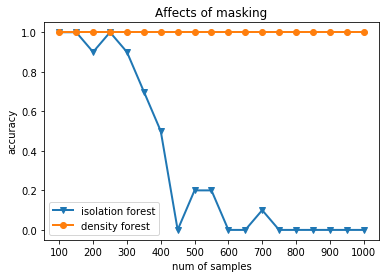

In [32]:
xlabel = np.arange(100, 1050, step=50)
plt.title('Affects of masking')
plt.plot(xlabel, res_iso / 30, label = "isolation forest", linewidth = 2, marker = "v")
plt.plot(xlabel, res / 30, label = "density forest", linewidth = 2, marker = "o")
plt.xticks(np.arange(100,1050, step = 100))
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('num of samples')
plt.savefig("masking.pdf", bbox_inches = 'tight')
plt.show()

This image is the average accuricy when there are 970 random vectors of dimension 10, and 30 points of all zeros. The error rate is set to 5%.  We check what percentage of the 30 zeros were caught by the algorithm. We see the isolation forest is very sensitive to the number of samples per tree (we have 20 trees). Nothing special about these parameters, the experiment results are pretty robust, in particular, the number of trees could be increased significantly without changing the outcome.